<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/HW/DATA601Sp22_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA601 - Fall 2023
### HW Assignment 2
Due date: October 17th, 23:59 pm

In [37]:
import numpy as np
import pandas as pd

In [38]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<b>Intro:</b> Download this zip file and extract it.
https://github.com/simsekergun/DATA601/raw/main/Datasets/DeviceData.zip

Make sure that your notebook and CSV files are under the same folder. <br>

There are 150 csv files. In each csv file, there are two columns: frequency (f) and efficiency (Q). First column is same in all the csv files.

The name of the files gives the device parameters. For example,
"Aphi_AirClad_H410RW855_PulleyCurved_Lc5_G100_W550_Mode1.csv" means that
- H = 410
- RW = 855
- Lc = 5
- G = 100
- W = 510

<b> Q1. </b> Use pandas to read these csv files with a for loop, create a dataframe called "device_performances", which lists first the device parameters (RW, Lc, G, W) and then all the Q values for each frequncy (from 1800 to 5000 at the steps of 5)
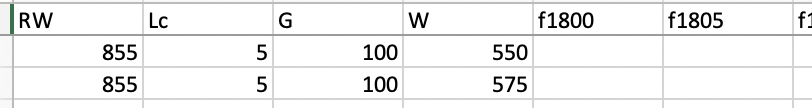

In [39]:
# Your answer is here
import os
path = '/content/drive/MyDrive/DeviceData'
dir_list = os.listdir(path)
dflist = []

for st in dir_list[0:len(dir_list)-1]:
    if st.endswith('.csv'):
        data_frame = pd.read_csv(os.path.join(path,st),names=['F','Q'], skiprows=1)

        RW=((st.split("_")[2]).split("H")[1]).split("RW")[1]
        Lc=(st.split("_")[4]).split("Lc")[1]
        G =(st.split("_")[5]).split("G")[1]
        W =(st.split("_")[6]).split("W")[1]

        data_frame['RW']=RW
        data_frame['Lc']=Lc
        data_frame['G']=G
        data_frame['W']=W

        dflist.append(data_frame)

device_performances = pd.concat(dflist,ignore_index = True, sort=False)

device_performances = device_performances.pivot(index=['RW', 'Lc', 'G', 'W'],columns = 'F', values = 'Q')

device_performances = device_performances.reset_index()
print(device_performances)



F     RW  Lc    G    W  180500000000000  181000000000000  181500000000000  \
0    855  10  100  550              NaN              NaN              NaN   
1    855  10  100  575              NaN              NaN              NaN   
2    855  10  100  600              NaN              NaN              NaN   
3    855  10  100  625              NaN              NaN              NaN   
4    855  10  100  650              NaN              NaN              NaN   
..   ...  ..  ...  ...              ...              ...              ...   
145  855   9  300  550              NaN              NaN              NaN   
146  855   9  300  575              NaN              NaN              NaN   
147  855   9  300  600              NaN              NaN              NaN   
148  855   9  300  625              NaN              NaN              NaN   
149  855   9  300  650              NaN              NaN              NaN   

F    182000000000000  182500000000000  183000000000000  ...  49550000000000

<b> Q2. </b> a. Determine the shape of your dataframe <br>
b. Check the first and last rows. <br>
c. Determine the basics statistics (mean, min, max, etc.) <br>
c. Remove the columns if they are all empty (or NaN)  <br>
d. Save your dataframe as a csv file.

In [40]:
# Your answer is here
# a.
print(device_performances.shape)

(150, 644)


In [41]:
# Your answer is here
# b.
print("First and Last Rows: ")
first_row=device_performances.head()
last_row=device_performances.tail()
pd.concat([first_row,last_row])

First and Last Rows: 


F,RW,Lc,G,W,180500000000000,181000000000000,181500000000000,182000000000000,182500000000000,183000000000000,...,495500000000000,496000000000000,496500000000000,497000000000000,497500000000000,498000000000000,498500000000000,499000000000000,499500000000000,500000000000000
0,855,10,100,550,NaN,NaN,NaN,NaN,NaN,NaN,...,6.477904e+05,6.493755e+05,6.509985e+05,6.526512e+05,6.543002e+05,6.559472e+05,6.576586e+05,6.593894e+05,6.611094e+05,6.627770e+05
1,855,10,100,575,NaN,NaN,NaN,NaN,NaN,NaN,...,4.124841e+05,4.144238e+05,4.163812e+05,4.183550e+05,4.203394e+05,4.223349e+05,4.243528e+05,4.263856e+05,4.284284e+05,4.304348e+05
2,855,10,100,600,NaN,NaN,NaN,NaN,NaN,NaN,...,3.177319e+05,3.196496e+05,3.215801e+05,3.235238e+05,3.254835e+05,3.274594e+05,3.294462e+05,3.314474e+05,3.334659e+05,3.354577e+05
3,855,10,100,625,NaN,NaN,NaN,NaN,NaN,NaN,...,2.745598e+05,2.764659e+05,2.783834e+05,2.803134e+05,2.822624e+05,2.842306e+05,2.862051e+05,2.881946e+05,2.902054e+05,2.921950e+05
4,855,10,100,650,NaN,NaN,NaN,NaN,NaN,NaN,...,2.550504e+05,2.569804e+05,2.589215e+05,2.608750e+05,2.628499e+05,2.648464e+05,2.668469e+05,2.688633e+05,2.709040e+05,2.729267e+05
145,855,9,300,550,NaN,NaN,NaN,NaN,NaN,NaN,...,3.219596e+08,3.260652e+08,3.302240e+08,3.344401e+08,3.387151e+08,3.430500e+08,3.474443e+08,3.518995e+08,3.564170e+08,3.609459e+08
146,855,9,300,575,NaN,NaN,NaN,NaN,NaN,NaN,...,2.542073e+08,2.577935e+08,2.614428e+08,2.651464e+08,2.689027e+08,2.727119e+08,2.765797e+08,2.805044e+08,2.844839e+08,2.884890e+08
147,855,9,300,600,NaN,NaN,NaN,NaN,NaN,NaN,...,2.240481e+08,2.274092e+08,2.308388e+08,2.343220e+08,2.378559e+08,2.414403e+08,2.450840e+08,2.487833e+08,2.525351e+08,2.563202e+08
148,855,9,300,625,NaN,NaN,NaN,NaN,NaN,NaN,...,2.133741e+08,2.167136e+08,2.201266e+08,2.235952e+08,2.271151e+08,2.306862e+08,2.343194e+08,2.380095e+08,2.417529e+08,2.455358e+08
149,855,9,300,650,NaN,NaN,NaN,NaN,NaN,NaN,...,2.125693e+08,2.159946e+08,2.194996e+08,2.230631e+08,2.266800e+08,2.303505e+08,2.340867e+08,2.378828e+08,2.417344e+08,2.456314e+08


In [42]:
# Your answer is here
# c.
device_performances.describe()

F,180500000000000,181000000000000,181500000000000,182000000000000,182500000000000,183000000000000,183500000000000,184000000000000,184500000000000,185000000000000,...,495500000000000,496000000000000,496500000000000,497000000000000,497500000000000,498000000000000,498500000000000,499000000000000,499500000000000,500000000000000
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.929152e+07,8.046807e+07,8.167144e+07,8.289345e+07,8.413298e+07,8.539013e+07,8.666815e+07,8.796569e+07,8.928070e+07,9.060909e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.295971e+08,1.316150e+08,1.336814e+08,1.357822e+08,1.379138e+08,1.400760e+08,1.422772e+08,1.445133e+08,1.467811e+08,1.490741e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.550504e+05,2.569804e+05,2.589215e+05,2.608750e+05,2.628499e+05,2.648464e+05,2.668469e+05,2.688633e+05,2.709040e+05,2.729267e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.800910e+06,1.818163e+06,1.835691e+06,1.853297e+06,1.871161e+06,1.889201e+06,1.907363e+06,1.925713e+06,1.944243e+06,1.962758e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.156564e+07,1.170032e+07,1.183791e+07,1.197654e+07,1.211698e+07,1.225933e+07,1.240301e+07,1.254870e+07,1.269557e+07,1.284344e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.195339e+07,7.296281e+07,7.399831e+07,7.504720e+07,7.611037e+07,7.718981e+07,7.828326e+07,7.939233e+07,8.051281e+07,8.164861e+07
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.202745e+08,5.289413e+08,5.378599e+08,5.469349e+08,5.561426e+08,5.654813e+08,5.750039e+08,5.846822e+08,5.944958e+08,6.044536e+08


In [44]:
device_performances.dropna(inplace=True,how='all',axis=1)
device_performances

dfnew=device_performances.dropna(axis=1, how='any')
dfnew
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	  print(dfnew)

F     RW  Lc    G    W  213000000000000  213500000000000  214000000000000  \
0    855  10  100  550     9.586664e+04     6.024408e+04     5.508201e+04   
1    855  10  100  575     2.820631e+04     2.679505e+04     2.559805e+04   
2    855  10  100  600     3.310633e+04     2.197957e+08     5.262840e+04   
3    855  10  100  625     2.166170e+04     2.070479e+04     2.001554e+04   
4    855  10  100  650     2.039495e+04     9.383931e+03     1.208577e+07   
5    855  10  150  550     7.195809e+03     1.422288e+05     1.288582e+05   
6    855  10  150  575     7.890796e+04     7.375255e+04     6.942561e+04   
7    855  10  150  600     1.304489e+05     1.255636e+08     3.087308e+05   
8    855  10  150  625     1.631743e+05     1.491917e+05     1.396892e+05   
9    855  10  150  650     4.610133e+05     5.578796e+04     2.006999e+07   
10   855  10  200  550     3.551364e+04     3.143135e+05     2.831436e+05   
11   855  10  200  575     2.225577e+05     2.049219e+05     1.903228e+05   

In [45]:
# Your answer is here
# d.
dfnew.to_csv('/content/drive/MyDrive/DeviceData/DataFrameSavedFile.csv')


<b> Q3. </b> Read the csv file you created in the previous question again using pandas.
Either using melt or stuck, create a new dataframe which list device parameters (RW, Lc, G, W), frequency, and quantum efficiency in the following format.

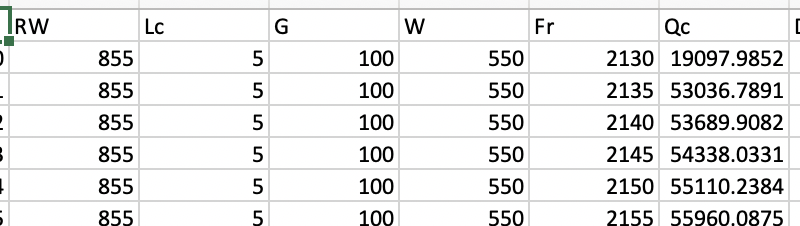

In [ ]:
# Your answer is here
"""import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive/DeviceData/")
newFol = pd.read_csv("DataFrameSavedFile.csv", index_col=0)

newDf=pd.DataFrame(newFol)
newDf
varsid = ['RW', 'Lc', 'G', 'W']

N = len(varsid)
N_ord = len(newDf.columns)-N
Dfwithstacked = (newDf.set_index(varsid)
        .stack(dropna=False)
        .reset_index()
        .rename(columns={0: 'Qc', f'level_{N}': 'Fr'}))
Dfwithstacked"""
import os
print(os.getcwd())
os.chdir("/content/drive/MyDrive/DeviceData/")
newFol = pd.read_csv("DataFrameSavedFile.csv", index_col=0)
varsid = ['RW', 'Lc', 'G', 'W']
N = len(varsid)
N_ord = len(newFol.columns) - N
final = newFol.reset_index().melt(id_vars=varsid, var_name=f'level_{N}', value_name='Fr')

print(final)



/content/drive/MyDrive/DeviceData
        RW  Lc    G    W          level_4            Fr
0      855  10  100  550            index  0.000000e+00
1      855  10  100  575            index  1.000000e+00
2      855  10  100  600            index  2.000000e+00
3      855  10  100  625            index  3.000000e+00
4      855  10  100  650            index  4.000000e+00
...    ...  ..  ...  ...              ...           ...
86395  855   9  300  550  500000000000000  3.609459e+08
86396  855   9  300  575  500000000000000  2.884890e+08
86397  855   9  300  600  500000000000000  2.563202e+08
86398  855   9  300  625  500000000000000  2.455358e+08
86399  855   9  300  650  500000000000000  2.456314e+08

[86400 rows x 6 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b> Q4. </b> Read the following dataset with pandas.
https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv', parse_dates=['Date'])

In [ ]:
df.head(5)

,Date,Store,Category,Subcategory,UPC EAN,Description,Dollars,Units
0,2018-07-11,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,35.68,4
1,2018-07-11,Store 2,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,166.74,14
2,2018-07-10,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,67.36,8
3,2018-07-10,Store 2,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,80.01,9
4,2018-07-12,Store 3,Beer,Ales,736920111112,Goose Island - Honkers Ale - 6 Pack,78.30,10


Use multiindexing and determine <br>
a. How much total money has been made in each store <br>
b. How many units have been sold <br>
c. Which store sold the highest number of beer units <br>
d. Most profitable product (profit = $$/unit)


In [ ]:
import pandas as pd

# Load the CSV file from the given URL and parse the 'Date' column as dates
def load_data(url):
    df = pd.read_csv(url, parse_dates=['Date'])
    return df

# a. How much total money has been made in each store
def total_money_made_in_each_store(df):
    money_made = df.groupby('Store')['Dollars'].sum()
    return money_made

# b. How many units have been sold
def total_units_sold(df):
    units_sold = df['Units'].sum()
    return units_sold

# c. Which store sold the highest number of beer units
def store_with_highest_beer_units(df):
    beer_units = df[df['Category'] == 'Beer'].groupby('Store')['Units'].sum()
    store_with_highest_units = beer_units.idxmax()
    return store_with_highest_units

# d. Most profitable product (profit = $$/unit)
def most_profitable_product(df):
    df['Profit per Unit'] = df['Dollars'] / df['Units']
    most_profitable = df.loc[df['Profit per Unit'].idxmax(), ['Category', 'Description']]
    return most_profitable

if __name__ == "__main__":
    url = 'https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/multiindex_dataset.csv'
    df = load_data(url)

    money_made_in_each_store = total_money_made_in_each_store(df)
    print("Total money has been made in each store:")
    print(money_made_in_each_store)

    units_sold = total_units_sold(df)
    print("Total no of units sold:", units_sold)

    store_with_highest_beer = store_with_highest_beer_units(df)
    print("The store which sold the highest number of beer units:", store_with_highest_beer)

    most_profitable = most_profitable_product(df)
    print("The product with highest profit is:")
    print(most_profitable)


Total money has been made in each store:
Store
Store 1    1649.40
Store 2    8221.65
Store 3    9073.29
Name: Dollars, dtype: float64
Total no of units sold: 1208
The store which sold the highest number of beer units: Store 3
The product with highest profit is:
Category                                                 Alcohol
Description    Glenlivet - 12 Year Scotch Whisky - 750 mL Bottle
Name: 125, dtype: object
